<a href="https://colab.research.google.com/github/raulbenitez/conceptosclaros_ML/blob/master/Introduccion_Series_Temporales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# 0. Time-series basic handling

## Read time series data from excel:

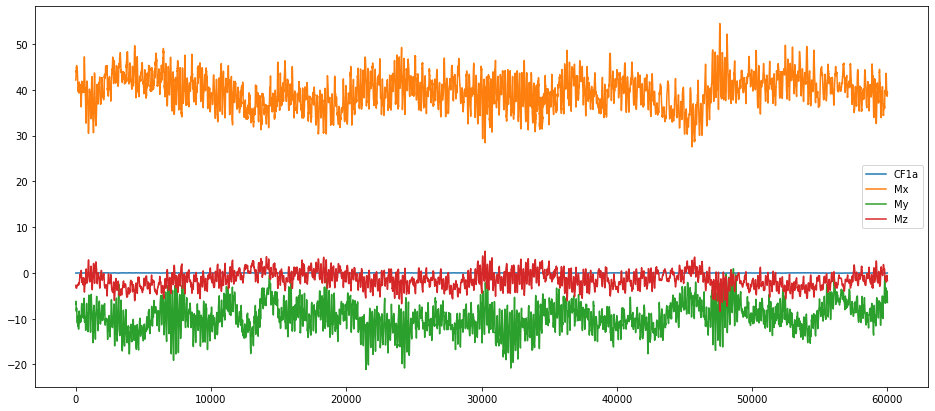

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/gdrive/My Drive/data_course/struct_data.txt', sep="\t", header=0)
data.columns = ["CF1a", "Mx", "My", "Mz"]
data.plot(figsize=(16,7))
plt.show()

In [3]:
print(data.shape)
print(data.dtypes)

(60000, 4)
CF1a    float64
Mx      float64
My      float64
Mz      float64
dtype: object


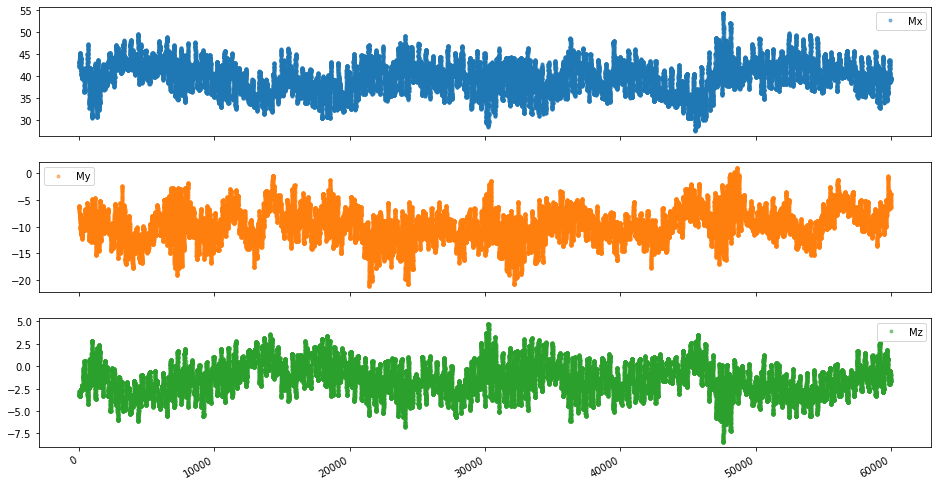

In [4]:
cols_plot = ['Mx', 'My', 'Mz']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 9), subplots=True)

## Scaling time-series

### Standardization
# $\hat{x} = \frac{x-\bar{x}}{\sigma_x}$

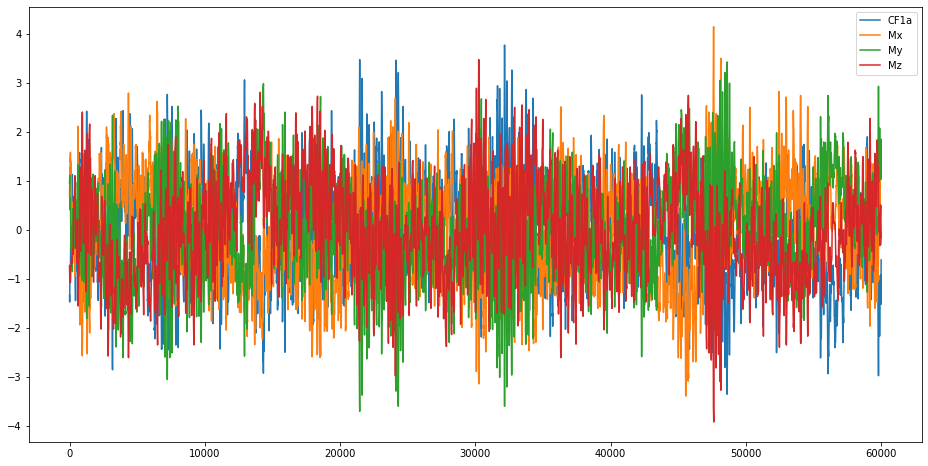

,CF1a,Mx,My,Mz
0,-1.334474,0.684331,0.945860,-0.728632
1,-1.355631,0.684331,0.973987,-0.777263
2,-1.385604,0.684331,0.992738,-0.777263
3,-1.420869,0.732691,1.011489,-0.809683
4,-1.449080,0.732691,1.011489,-0.809683


In [6]:
from sklearn.preprocessing import scale

dscal1 = scale(data)
data_scaled = pd.DataFrame(dscal1,columns = ["CF1a", "Mx", "My", "Mz"])
data_scaled.plot(figsize=(16,8))
plt.show()
data_scaled.head()

### Normalization 

# $\tilde{x} = \frac{x-x_{min}}{x_{max}-x_{min}}$

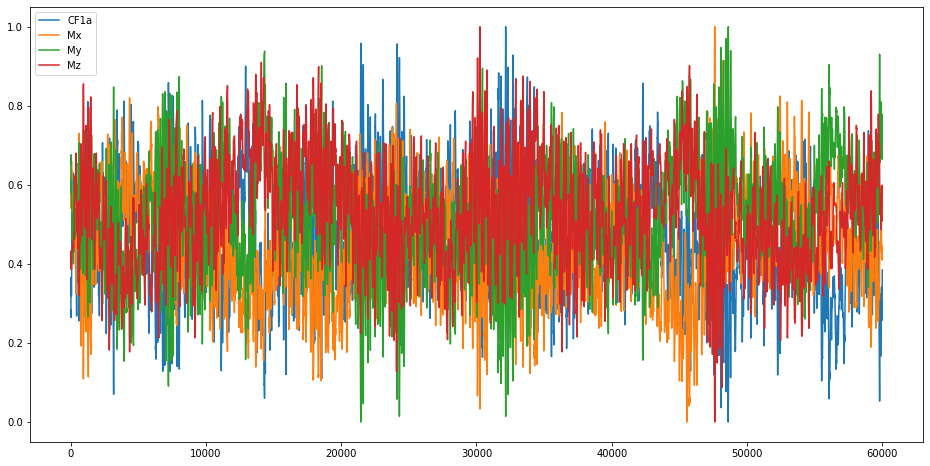

,CF1a,Mx,My,Mz
0,0.283663,0.541177,0.652632,0.432018
1,0.280693,0.541177,0.656579,0.425439
2,0.276485,0.541177,0.659210,0.425439
3,0.271535,0.547594,0.661842,0.421053
4,0.267574,0.547594,0.661842,0.421053


In [8]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
dscal2 = min_max_scaler.fit_transform(data)
data_norm = pd.DataFrame(dscal2,columns = ["CF1a", "Mx", "My", "Mz"])
data_norm.plot(figsize=(16,8))
plt.show()
data_norm.head()

### Scale data to specified range (min,max):

## $x_{scaled} = \tilde{x}(\text{max}-\text{min})+\text{min}$

where 

## $\tilde{x} = \frac{x-x_{min}}{x_{max}-x_{min}}$

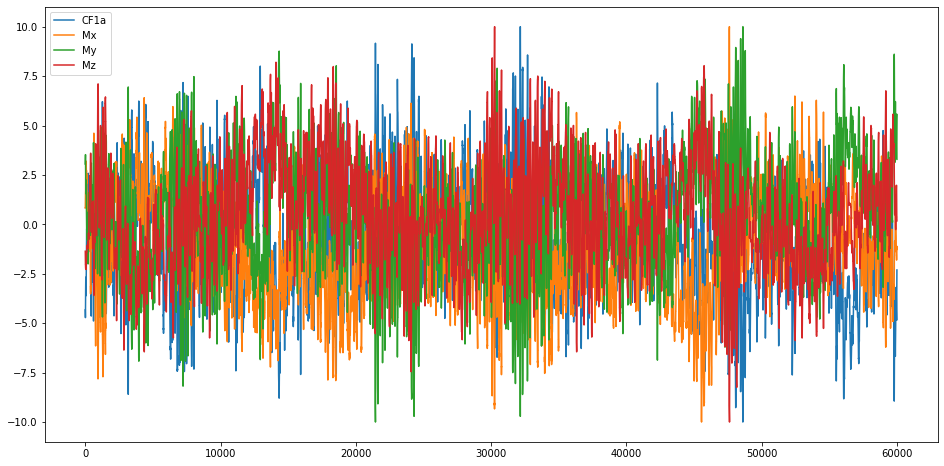

In [9]:
min_max_scaler2 = MinMaxScaler(feature_range=(-10, 10))
dscal3 = min_max_scaler2.fit_transform(data)
data_scal1 = pd.DataFrame(dscal3,columns = ["CF1a", "Mx", "My", "Mz"])
data_scal1.plot(figsize=(16,8))
plt.show()

### Scale data to range [-1,1]:

Scaled data lies within the range [-1, 1] by dividing through the largest maximum value in each time-series

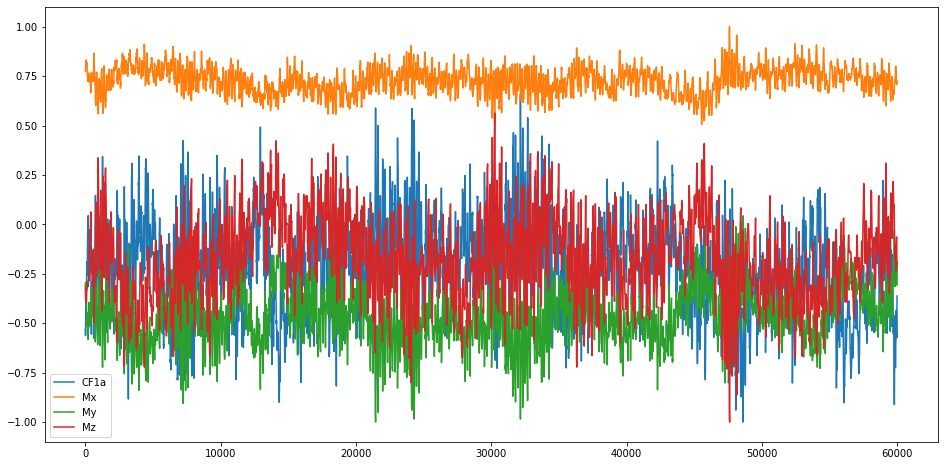

In [10]:
from sklearn.preprocessing import MaxAbsScaler
max_abs_scaler = preprocessing.MaxAbsScaler()
dscal4 = max_abs_scaler.fit_transform(data)
data_scal2 = pd.DataFrame(dscal4,columns = ["CF1a", "Mx", "My", "Mz"])
data_scal2.plot(figsize=(16,8))
plt.show()

## Dealing with date and timestamps: The Pandas Timestamp 

In [11]:
import pandas as pd
pd.to_datetime('2018-01-15 3:45pm')

Timestamp('2018-01-15 15:45:00')

In [12]:
pd.to_datetime(['4th of July, 2015','2015-Jul-6', '07-07-2015', '20150708'])

DatetimeIndex(['2015-07-04', '2015-07-06', '2015-07-07', '2015-07-08'], dtype='datetime64[ns]', freq=None)

In [13]:
pd.to_datetime('7/8/1952', dayfirst=True)

Timestamp('1952-08-07 00:00:00')

Generate a sequence of timestamps: 

Frequency codes:

D	Calendar day	
W	Weekly		
M	Month end	
Q	Quarter end	
A	Year end	
H	Hours	
T	Minutes		
S	Seconds		
L	Milliseonds		
U	Microseconds		
N	nanoseconds

In [14]:
pd.date_range('2019-07-18', periods=10, freq='H')

DatetimeIndex(['2019-07-18 00:00:00', '2019-07-18 01:00:00',
               '2019-07-18 02:00:00', '2019-07-18 03:00:00',
               '2019-07-18 04:00:00', '2019-07-18 05:00:00',
               '2019-07-18 06:00:00', '2019-07-18 07:00:00',
               '2019-07-18 08:00:00', '2019-07-18 09:00:00'],
              dtype='datetime64[ns]', freq='H')

In [15]:
pd.date_range('2019-07-18', periods=10, freq='M')

DatetimeIndex(['2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29',
               '2020-03-31', '2020-04-30'],
              dtype='datetime64[ns]', freq='M')

Assign a certain sequence to a previously loaded dataframe

In [16]:
data.index = pd.date_range('2010-07-18', periods=data.shape[0], freq='T')

In [17]:
data.tail()


,CF1a,Mx,My,Mz
2010-08-28 15:55:00,-0.029145,39.40959,-6.068361,-1.691354
2010-08-28 15:56:00,-0.028443,39.32320,-6.300058,-1.691354
2010-08-28 15:57:00,-0.028108,39.29440,-6.329020,-1.691354
2010-08-28 15:58:00,-0.027589,39.29440,-6.415906,-1.691354
2010-08-28 15:59:00,-0.026948,39.29440,-6.473830,-1.720160


You can construct consistent datetime index from different columns: